In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_excel('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/NO_HEADER_First Dataset.xlsx',header=None)
print('Train Data:')
display(df_train.head())
print()
df_test = pd.read_excel('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/NO_HEADER_Second Dataset.xlsx',header=None)
print('Test Data:')
display(df_test.head())


Train Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0



Test Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train_df = df_train.iloc[:, :14]
y_train_df = df_train.iloc[:, 14:]
X_test_df = df_test.iloc[:, :14]
y_test_df = df_test.iloc[:, 14:]

Box Plot of training data:


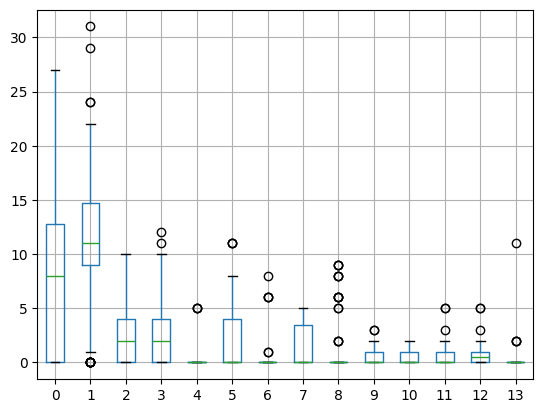

Density Plot of overall training Data:


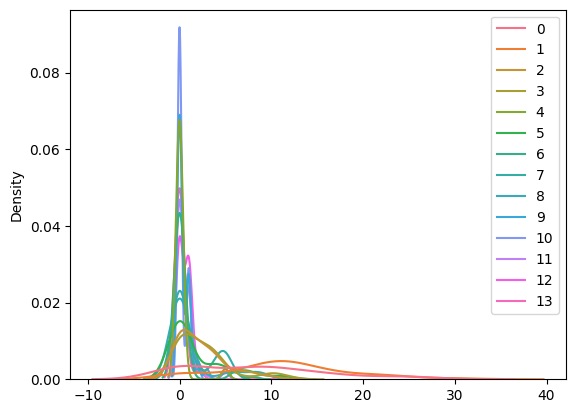

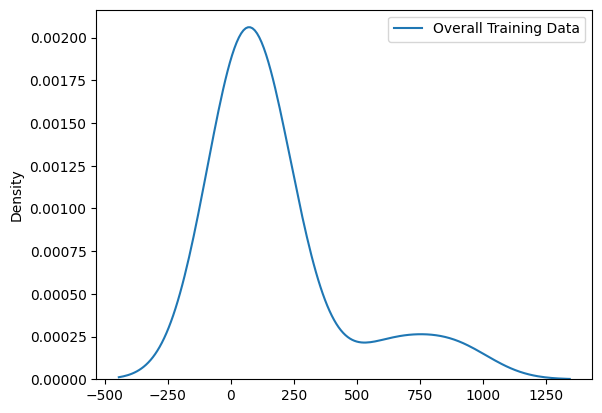

Box Plot of testing data:


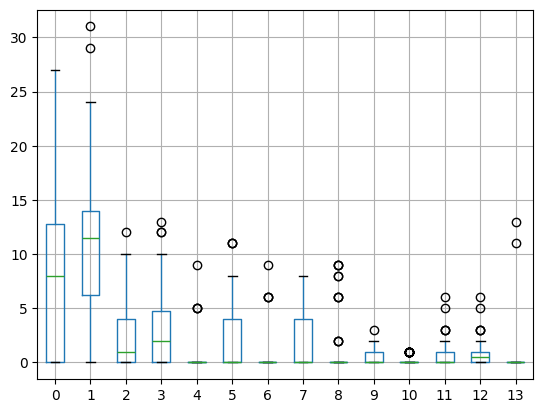

Density Plot of overall test Data:


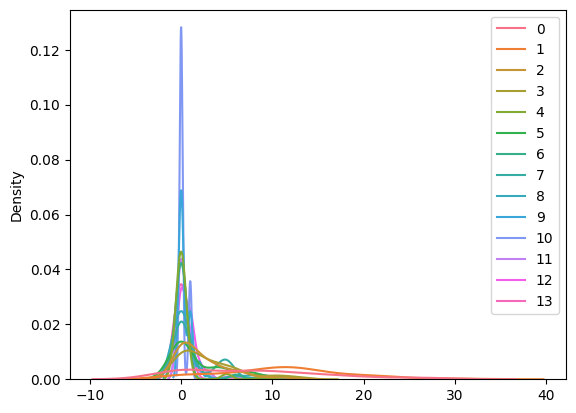

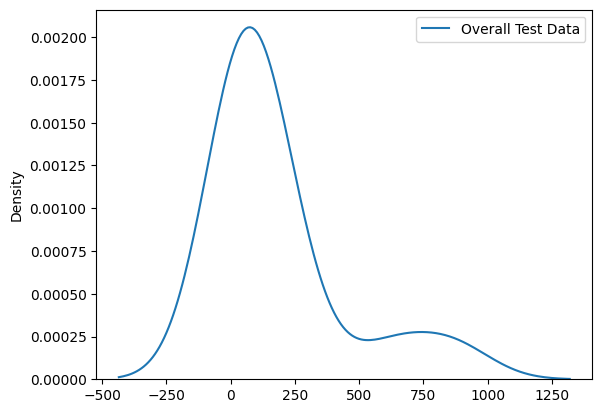

In [18]:
print('Box Plot of training data:')
X_train_df.boxplot()
plt.show()

print('Density Plot of overall training Data:')
sns.kdeplot(X_train_df)
plt.show()

sns.kdeplot(data=X_train_df.sum(), label="Overall Training Data")
plt.legend()
plt.show()

print('Box Plot of testing data:')
X_test_df.boxplot()
plt.show()

print('Density Plot of overall test Data:')
sns.kdeplot(X_test_df)
plt.show()

sns.kdeplot(data=X_test_df.sum(), label="Overall Test Data")
plt.legend()
plt.show()

In [7]:
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

## Normalize testing data
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

Training Data Box Plot


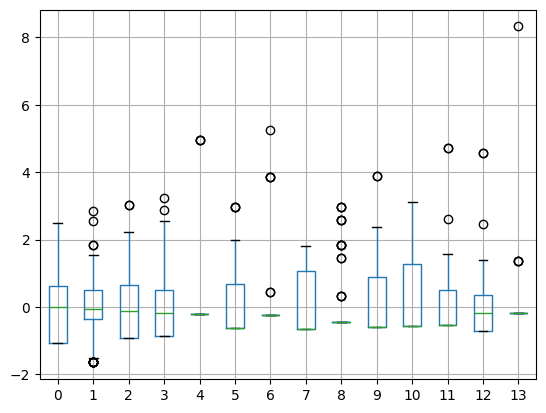

Test Data Box Plot


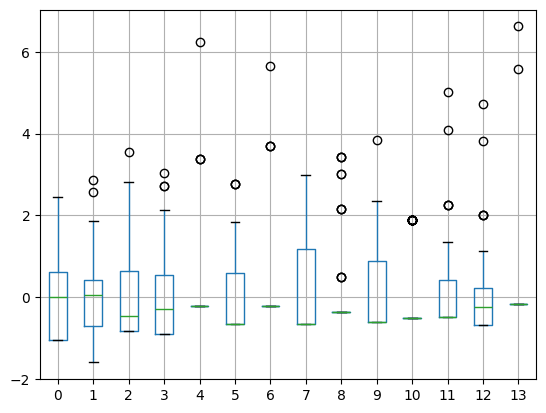

Density overall Plot of overall Normalized Training Data


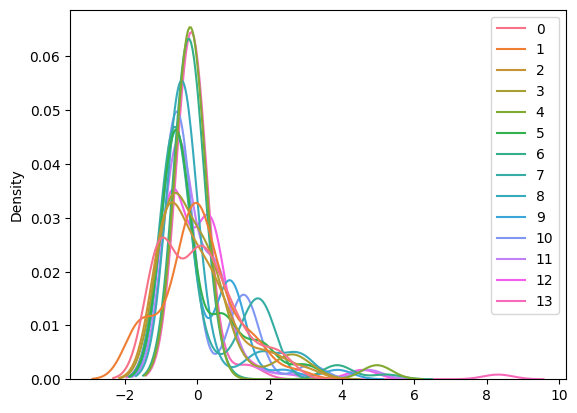

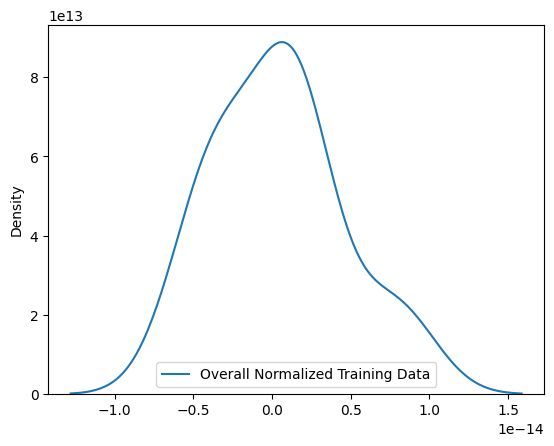

Density overall Plot of overall Normalized Test Data


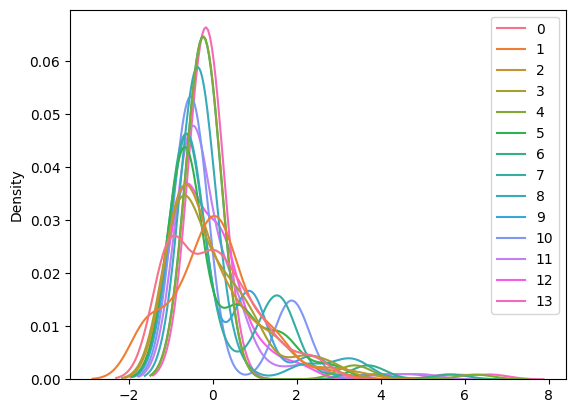

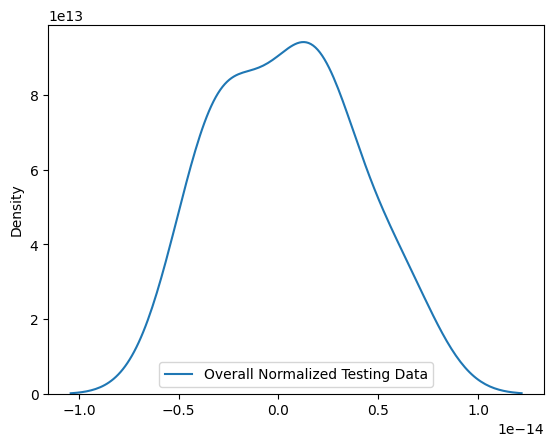

In [24]:
print('Training Data Box Plot')
normalized_X_train_df.boxplot()
plt.show()

print('Test Data Box Plot')
normalized_X_test_df.boxplot()
plt.show()

print('Density overall Plot of overall Normalized Training Data')
sns.kdeplot(normalized_X_train_df)
plt.show()

sns.kdeplot(data = normalized_X_train_df.sum(axis=0), label="Overall Normalized Training Data")
plt.legend()
plt.show()

print('Density overall Plot of overall Normalized Test Data')
sns.kdeplot(normalized_X_test_df)
plt.show()

sns.kdeplot(normalized_X_test_df.sum(axis=0), label="Overall Normalized Testing Data")
plt.legend()
plt.show()
